In [20]:
# load libraries
library(ggplot2)
library(dplyr)

In [21]:
# function to create the standard errors for the subset model estimates
confidence_interval <- function(vector, interval) {
  # Standard deviation of sample
  vec_sd <- sd(vector)
  # Sample size
  n <- length(vector)
  # Mean of sample
  vec_mean <- mean(vector)
  # Error according to t distribution
  error <- qt((interval + 1)/2, df = n - 1) * vec_sd / sqrt(n)
  # Confidence interval as a vector
  result <- c("lower" = vec_mean - error, "upper" = vec_mean + error)
  return(result)
}

In [22]:
list_of_reactions <- readRDS("./baseline_upvote_all/list_of_reactions.RDS")

In [23]:
# aggregate data
df_of_reactions <- as.data.frame(do.call(rbind, list_of_reactions))
head(df_of_reactions)

,x,predicted,std.error,conf.low,conf.high,group,group_col
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>
1,deliberation,0.034609458,0.02060145,-0.005768645,0.07498756,baseline,baseline
2,deliberation,0.045613262,0.02126269,0.003939149,0.08728738,upvote_only,upvote_only
3,demagoguery,-0.004034183,0.02060145,-0.044412286,0.03634392,baseline,baseline
4,demagoguery,-0.020305674,0.02126269,-0.061979787,0.02136844,upvote_only,upvote_only
5,civic,0.027855630,0.02060145,-0.012522473,0.06823373,baseline,baseline
6,civic,0.040100274,0.02126269,-0.001573840,0.08177439,upvote_only,upvote_only


In [24]:
# calculate confidence intervals and mean estimators
df_reactions <- cbind.data.frame(aggregate(.~x+group, df_of_reactions,mean),aggregate(.~x+group, df_of_reactions[,c(1,2,6)],function(x) confidence_interval(x, 0.95))$predicted)

In [25]:
# format and rename data
df_reactions$group <- as.character(df_reactions$group)
df_reactions$group[df_reactions$group=='baseline'] <- 'up/downvotes'
df_reactions$group[df_reactions$group=='intervention'] <- 'only upvotes'

In [26]:
df_reactions

x,group,predicted,std.error,conf.low,conf.high,group_col,lower,upper
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
civic,up/downvotes,0.030176187,0.02223715,-0.0134078186,0.07376019,1,0.028873061,0.031479312
deliberation,up/downvotes,0.038653399,0.02223715,-0.0049306060,0.08223740,1,0.036802483,0.040504315
demagoguery,up/downvotes,-0.003802823,0.02223715,-0.0473868279,0.03978118,1,-0.005137717,-0.002467929
civic,upvote_only,0.044642092,0.02285625,-0.0001553386,0.08943952,2,0.043027716,0.046256468
deliberation,upvote_only,0.050538348,0.02285625,0.0057409173,0.09533578,2,0.048277383,0.052799313
demagoguery,upvote_only,-0.023629748,0.02285625,-0.0684271788,0.02116768,2,-0.025170778,-0.022088719


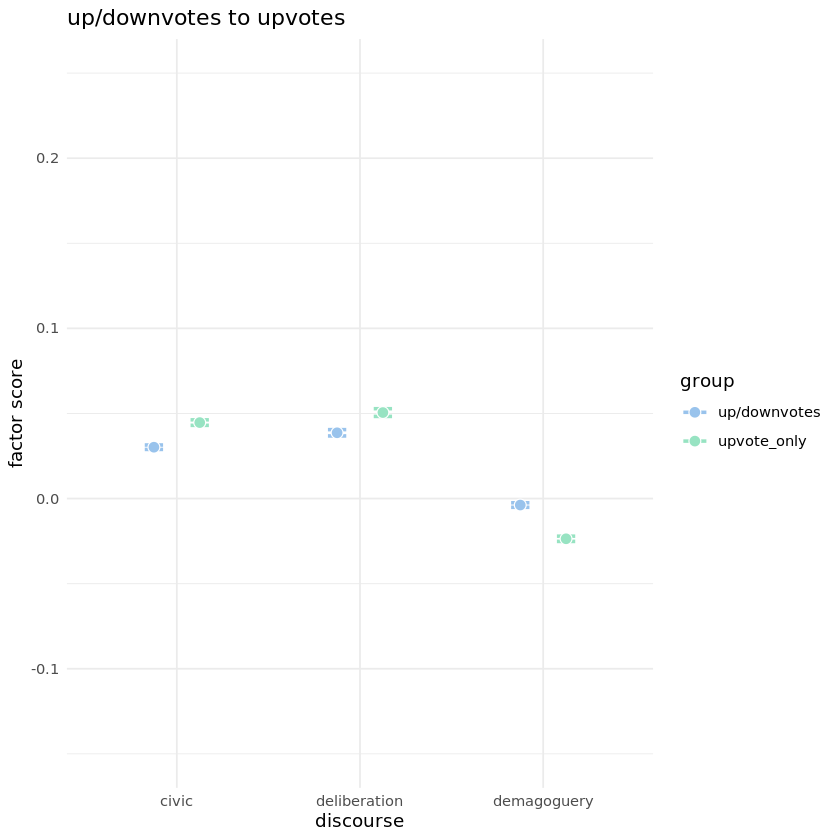

In [32]:
q <- ggplot(data=df_reactions, mapping=aes(x=x, y = predicted, ymin=upper, ymax=lower, col=group,fill= group), width=0.02, size=0.1, color="blue") +
  geom_errorbar(size=1,position=position_dodge(width = 0.5), width = 0.2) + 
  scale_fill_manual(values=c("#99C3EC", "#97E3C2")) +
  scale_color_manual(values=c("#99C3EC", "#97E3C2")) +
  theme_minimal() +
  geom_point(size=3, shape=21, colour="white", stroke = 0.5,position=position_dodge(width = 0.5)) +
  xlab("discourse") + ylab("factor score") + ggtitle('up/downvotes to upvotes') +  ylim(-0.15, 0.25)
 #+ theme(text=element_text(size=13)) + theme(aspect.ratio = 0.7)
ggsave(plot = q, width = 5, height = 3, dpi = 300, filename = "upvote.png")
q 